## <center>회귀분석2 HW 2</center>

### **CH06, 07**

### 1. 어떤 공장에서 물의 소비량을 조사하기 위하여 매달의 물소비량($y$), 평균온도($x_1$), 작업일수($x_2$)와 작업량($x_3$)에 관한 데이터를 얻었다.

In [99]:
library(car)
library(lmtest)

In [2]:
df = data.frame(y = c(2.8, 3.9, 3.9, 4.4, 3.1, 3.1, 3.5, 3.6, 3.0, 3.3),
                x1 = c(10, 24, 25, 28, 15, 18, 22, 22, 12, 15),
                x2 = c(27, 26, 28, 26, 30, 24, 27, 25, 27, 25),
                x3 = c(64, 72, 80, 88, 81, 45, 46, 69, 54, 39))
df

y,x1,x2,x3
<dbl>,<dbl>,<dbl>,<dbl>
2.8,10,27,64
3.9,24,26,72
3.9,25,28,80
4.4,28,26,88
3.1,15,30,81
3.1,18,24,45
3.5,22,27,46
3.6,22,25,69
3.0,12,27,54


**(1) 데이터로부터 회귀모형, $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1 + \hat{\beta_2}x_2 + \hat{\beta_3}x_3$을 구하여라.**

In [3]:
model <- lm(y~., df)
model


Call:
lm(formula = y ~ ., data = df)

Coefficients:
(Intercept)           x1           x2           x3  
   2.409213     0.069788    -0.024767     0.005864  


적합된 회귀모형 : $\hat{y} = 2.4092 + 0.0698x_1 - 0.0248x_2 + 0.0059x_3$

**(2) $\hat{\beta_1},~\hat{\beta_2},~\hat{\beta_3}$ 의 의미는 무엇인가?**

* $\hat{\beta_1}$ : 작업일수($x_2$)와 작업량($x_3$)이 고정되어 있을 때 평균온도를 1만큼 상승시키면 물 소비량이 0.0698만큼 증가한다.
* $\hat{\beta_2}$ : 평균온도($x_1$)와 작업량($x_3$)이 고정되어 있을 때, 작업일수가 하루 늘어나면 물 소비량이 0.0248만큼 감소한다. (?)
* $\hat{\beta_3}$ : 평균온도($x_1$)와 작업일수($x_2$)가 고정되어 있을 때, 작업량이 1만큼 늘어나면 물 소비량은 0.0059만큼 증가한다.

**(3) 분산분석표를 작성하고, 결정계수 $R^2$를 구하시오.**

`-` 분산분석표 작성

In [4]:
null_model = lm(y~1, df)
anova(model, null_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6,0.1775339,NA,NA,NA,NA
2,9,2.2240000,-3,-2.046466,23.05437,0.001078865


In [5]:
SSR <- apply(anova(model)[1:3, 1:2], 2, sum)
SST <- SSR + anova(model)[4, 1:2]

In [6]:
anov = rbind(SSR, anova(model)[4, 1:2], SST)
rownames(anov) <- c("회귀", "잔차", "총")
anov = cbind(anov, (anov[2] / anov[1]))
anov = cbind(anov, anov[1,3] / anov[2,3], pf(anov[1,3] / anov[2,3], 3, 6, lower.tail = FALSE))
colnames(anov) <- c("Df", "Sum Sq", "Mean Sq", "F value", "Pr(>F)")
anov[3, 3:5] <- NA
anov[2, 4:5] <- NA
anov

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
회귀,3,2.0464661,0.68215537,23.05437,0.001078865
잔차,6,0.1775339,0.02958898,NA,NA
총,9,2.2240000,NA,NA,NA


`-` $R^2$ 값 계산

In [7]:
summary(model)$r.squared

[1] 0.9201736

**(4) 수정된 결정계수를 구하여라.**

In [8]:
summary(model)$adj.r.squared

[1] 0.8802604

**(5) $Var(\hat{\beta_3})$ 을 구하시오. $\sigma^2$을 MSE로 추정하면 $\widehat{Var}(\hat{\beta_3})$ 은 무엇인가?**

In [9]:
X <- cbind(1, as.matrix(df[2:4]))
MSE <- (summary(model)$sigma)^2
solve_XX <- solve(t(X)%*%X)
solve_XX

,,x1,x2,x3
,42.8460778,-0.274517258,-1.666784957,0.1044984818
x1,-0.2745173,0.005399764,0.009802163,-0.0013851965
x2,-1.6667850,0.009802163,0.067921641,-0.0050213139
x3,0.1044985,-0.001385196,-0.005021314,0.0008624387


`-` $Var(\hat{\beta_3})$ 의 값

In [10]:
print(paste(solve_XX[4,4], "× Var(y)"))

[1] "0.0008624387021274 × Var(y)"


`-` $\widehat{Var}(\hat{\beta_3})$ 의 값

In [11]:
solve_XX[4,4]*MSE

[1] 2.551868e-05

In [12]:
vcov(model)[4,4]

[1] 2.551868e-05

**(6) $x_1 = 20,~x_2 = 27,~x_3 = 60$에서 평균 물소비량을 추정하시오. 이 추정된 소비량의 표준편차의 추정값을 구하시오.**

`-` 평균 물 소비량 추정 : $\widehat{E(Y | \textbf{x})}$

In [13]:
predict(model, newdata = data.frame(x1 = 20, x2 = 27, x3 = 60))

1 
3.488141

`-` 추정된 평균 물 소비량의 표준편차 추정 : $\widehat{Var(\hat{\mu_0})}$

In [14]:
x_0 <- c(1, 20, 27, 60)

In [15]:
as.numeric(t(x_0)%*%solve_XX%*%x_0*MSE)

[1] 0.005065205

**(7) $x_1 = 20,~x_2 = 27,~x_3 = 60$ 에서 어느 한 달의 물 소비량 $y_0$를 예측하여라. 이 예측된 물 소비량의 표준편차의 추정값을 구하시오.**

`-` 개별 물 소비량 추정 : $\hat{y_0} = \widehat{E(Y | \textbf{x})}$

In [16]:
predict(model, newdata = data.frame(x1 = 20, x2 = 27, x3 = 60))

1 
3.488141

`-` 추정된 개별 물 소비량의 표준편차 추정 : $\widehat{Var(\hat{y_0}})$

In [17]:
as.numeric((1 + t(x_0)%*%solve_XX%*%x_0)*MSE)

[1] 0.03465419

**(8) $\beta_3$ 의 $95\%$ 신뢰구간을 구하시오. 이 신뢰구간의 의미를 해석하시오.**

In [18]:
summary(model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.409213010,1.125953765,2.1397087,0.076181015
x1,0.069788005,0.012640155,5.5211353,0.001485354
x2,-0.024766597,0.044830038,-0.5524554,0.600595338
x3,0.005864434,0.005051602,1.1609058,0.289775583


In [19]:
sigma_3 <- summary(model)$coef[4,2]
lwb <- model$coef[4] - qt(0.975, 10-4)*sigma_3
upb <- model$coef[4] + qt(0.975, 10-4)*sigma_3

print(paste("회귀계수에 대한 95% CI : (", lwb, ", ", upb, ")", sep = ""))

[1] "회귀계수에 대한 95% CI : (-0.00649639079638348, 0.0182252595602561)"


> 해당 신뢰구간이 $\beta_3$ 를 포함할 확률이 95%라는 의미이다. 개별 회귀계수의 검정에서 귀무가설이 $H_0 : \beta_3 = 0$ 인데, 0이 이 구간에 포함되어 있다. 따라서 해당 신뢰구간은 회귀계수가 유의하지 않다는 것을 뒷받침한다.

In [20]:
confint(model, level = 0.95)[4,]

2.5 %       97.5 % 
-0.006496391  0.018225260

**(9) $\beta_1$ 의 $99\%$ 신뢰구간을 구하시오. 이 신뢰구간의 의미를 해석하시오.**

In [21]:
sigma_1 <- summary(model)$coef[2,2]
lwb <- model$coef[2] - qt(0.995, 10-4)*sigma_1
upb <- model$coef[2] + qt(0.995, 10-4)*sigma_1

print(paste("회귀계수에 대한 99% CI : (", lwb, ", ", upb, ")", sep = ""))

[1] "회귀계수에 대한 99% CI : (0.0229255411545763, 0.116650469571381)"


> 해당 신뢰구간이 $\beta_1$ 를 포함할 확률이 99%라는 의미이다. 개별 회귀계수의 검정에서 귀무가설이 $H_0 : \beta_1 = 0$ 인데, 0이 이 구간에 포함되어 있지 않으므로, 해당 신뢰구간은 회귀계수가 유의하다는 것을 뒷받침한다.

In [22]:
confint(model, level = 0.99)[2,]

0.5 %     99.5 % 
0.02292554 0.11665047

**(10) $x_1 = 20,~x_2 = 27,~x_3 = 60$ 에서 평균 물 소비량, $E(y)$ 의 $95\%$ 신뢰구간을 구하시오.**

In [23]:
CI <- predict(model, newdata = data.frame(x1 = 20, x2 = 27, x3 = 60), interval = "confidence", level = 0.95)
print(paste("평균 물 소비량의 95% CI : (", CI[2], ", ", CI[3], ")", sep = ""))

[1] "평균 물 소비량의 95% CI : (3.31399371197438, 3.66228839915852)"


**(11) 가설 $H_0 : \beta_1 = 0,~ vs. ~ H_1 : \beta_1 > 0$ 을 $\alpha = 0.05$ 로 검정하시오.**

ⅰ) 검정통계량 $T = \frac{\hat{\beta_1}-0}{\sigma_{\hat{\beta_1}}} \sim N(\beta_1, \sigma_{\hat{\beta_1}}^2)$

ⅱ) 검정통계량의 관측값

In [24]:
t_value = model$coef[2] / summary(model)$coef[2,2]
t_value

x1 
5.521135

ⅲ) p-value

In [25]:
p_value = pt(t_value, 10-4, lower.tail = FALSE)
p_value

x1 
0.0007426772

In [26]:
summary(model)$coef[2,4]/2

[1] 0.0007426772

In [27]:
p_value < 0.05

x1 
TRUE

> p-value가 유의수준 $\alpha = 0.05$ 보다 작으므로, 귀무가설을 기각하고 대립가설을 수용한다. 즉, $\beta_1$ 은 0보다 크다.

**(12) 가설 $H_0 : \beta_1 = \beta_2 = \beta_3$ 을 $\alpha = 0.05$ 로 검정하시오.**

$H_1 : ￢~H_0$

* $RM : y = \gamma_0 + \gamma_1(x_1+x_2+x_3) + \epsilon$

In [28]:
df_rm = data.frame(df[,1], apply(df[,2:4], 1, sum))
colnames(df_rm) = c("y", "x")
df_rm

y,x
<dbl>,<dbl>
2.8,101
3.9,122
3.9,133
4.4,142
3.1,126
3.1,87
3.5,95
3.6,116
3.0,93


In [29]:
model_rm = lm(y~x, df_rm)
anova(model_rm, model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8,1.1224764,NA,NA,NA,NA
2,6,0.1775339,2,0.9449425,15.96781,0.003956509


$p-value$가 주어진 유의수준 $\alpha = 0.05$보다 작으므로, 귀무가설을 기각한다. 즉, $\beta_1,~ \beta_2,~ \beta_3$는 셋 중 하나라도 같지 않다.

`-` 또는 아래의 방식을 사용

\begin{equation}
T = 
   \begin{pmatrix} 
   0 & 1 & -1 & 0  \\
   0 & 1 & 0 & -1  \\
   \end{pmatrix} 
, ~ c = 0
\end{equation}

In [30]:
linearHypothesis(model, matrix(c(0,1,-1,0,0,1,0,-1), nrow = 2, byrow = TRUE), 0)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,8,1.1224764,NA,NA,NA,NA
2,6,0.1775339,2,0.9449425,15.96781,0.003956509


> 동일한 결과

**(13) 가설 $H_0 : \beta_1 = \beta_2 + 3$ 을 $\alpha = 0.05$ 로 검정하시오.**

$H_1 : ￢~H_0$

In [31]:
linearHypothesis(model, c(0, 1, -1, 0), 3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,157.3270492,NA,NA,NA,NA
2,6,0.1775339,1,157.1495,5311.082,4.492288e-10


> p-value가 주어진 유의수준 0.05보다 작으므로 귀무가설을 기각한다. 즉, $\beta_1 \neq \beta_2+3$이다.

**(14) $x_1 = 20, ~ x_2 = 27, ~ x_3 = 60$ 에서 $E(y)$에 관한 가설 $H_0 : E(y) = 3.5,~vs.~H_1 : E(y) \neq 3.5$를 $\alpha = 0.05$로 검정하시오.**

ⅰ) 검정통계량

$$\widehat{E(y)} \sim_{H_0} N(3.5, \sigma^2)$$

In [32]:
x_0 <- c(1,20,27,60)
y_hat <- predict(model, data.frame(x1 = 20, x2 = 27, x3 = 60))
y_var <- t(x_0)%*%solve_XX%*%x_0*(summary(model)$sigma^2)

In [33]:
sqrt(y_var)
y_hat

0.07117026


1 
3.488141

$$\therefore T = \frac{\widehat{E(y)} - 3.5}{0.07117} \sim_{H_0} t(n-p-1)$$

ⅱ) 검정통계량 관측치

In [34]:
t_value <- (y_hat - 3.5)/sqrt(y_var)
t_value

-0.1666278


ⅲ) $p-value$

In [35]:
n = nrow(df)
p_value <- pt(t_value, n-3-1)*2  ## 양측검정
p_value

0.8731365


> 따라서 p-value가 유의수준 $\alpha = 0.05$보다 작으므로 귀무가설을 기각할 수 없다. 즉, $E(y) = 3.5$이다.

### 2. 피노 누아 와인의 품질은 투명도, 향, 바디, 맛, 그리고 오크향의 특성과 관련이 있다고 생각된다. 'wine38.csv'파일은 38개 와인 데이터이다. 다음 물음에 답하여라.

**(1) 와인 품질과 이러한 예측변수들 사이의 관계를 나타내는 다중 선형 회귀 모델을 적합시켜라.**

In [36]:
setwd("~/R/regression analysis/data/")
df <- read.csv("wine38.csv", header = TRUE)
head(df)

,Clarity,Aroma,Body,Flavor,Oakiness,Quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,3.3,2.8,3.1,4.1,9.8
2,1,4.4,4.9,3.5,3.9,12.6
3,1,3.9,5.3,4.8,4.7,11.9
4,1,3.9,2.6,3.1,3.6,11.1
5,1,5.6,5.1,5.5,5.1,13.3
6,1,4.6,4.7,5.0,4.1,12.8


In [37]:
predictr <- lm(Quality~., df)
summary(predictr)


Call:
lm(formula = Quality ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.85552 -0.57448 -0.07092  0.67275  1.68093 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.9969     2.2318   1.791 0.082775 .  
Clarity       2.3395     1.7348   1.349 0.186958    
Aroma         0.4826     0.2724   1.771 0.086058 .  
Body          0.2732     0.3326   0.821 0.417503    
Flavor        1.1683     0.3045   3.837 0.000552 ***
Oakiness     -0.6840     0.2712  -2.522 0.016833 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.163 on 32 degrees of freedom
Multiple R-squared:  0.7206,	Adjusted R-squared:  0.6769 
F-statistic: 16.51 on 5 and 32 DF,  p-value: 4.703e-08


**(2) 회귀모형에 대한 유의성검정을 하여라. 어떤 결론을 도출할 수 있는가?**

ⅰ) 가설

$$H_0 : \beta_0 = \beta_1 = \dots = \beta_5 = 0,~vs.~H_1 : ￢~H_0$$

ⅱ) ANOVA table

In [38]:
null_predictr <- lm(Quality~1, df)
anova(predictr, null_predictr)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32,43.24801,NA,NA,NA,NA
2,37,154.78842,-5,-111.5404,16.50616,4.70304e-08


> p-value가 주어진 유의수준 $\alpha = 0.05$보다 작으므로 귀무가설을 기각하고 대립가설을 수용한다. 즉, 적합된 회귀모형은 유의하다.

**(3) 각 예측변수가 모델에 미치는 기여도를 평가하기 위해 t 검정을 수행하고, 발견한 내용에 대해 논의하시오.**

$$H_0 : \beta_i = 0,~i=1,3,5$$

In [39]:
summary(predictr)


Call:
lm(formula = Quality ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.85552 -0.57448 -0.07092  0.67275  1.68093 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.9969     2.2318   1.791 0.082775 .  
Clarity       2.3395     1.7348   1.349 0.186958    
Aroma         0.4826     0.2724   1.771 0.086058 .  
Body          0.2732     0.3326   0.821 0.417503    
Flavor        1.1683     0.3045   3.837 0.000552 ***
Oakiness     -0.6840     0.2712  -2.522 0.016833 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.163 on 32 degrees of freedom
Multiple R-squared:  0.7206,	Adjusted R-squared:  0.6769 
F-statistic: 16.51 on 5 and 32 DF,  p-value: 4.703e-08


In [40]:
summary(predictr)$coef[-1,4] < 0.05

Clarity    Aroma     Body   Flavor Oakiness 
   FALSE    FALSE    FALSE     TRUE     TRUE

> 각 예측변수에 대해서 t 검정을 수행하면, p-value가 주어진 유의수준인 $\alpha = 0.05$보다 작았던 것은 맛(Flavor)과 오크향(Oakiness)이었다. 즉, 와인의 품질에 맛과 오크향만 통계적으로 유의하게 영향을 미치고 다른 변수들은 그러지 못했다.

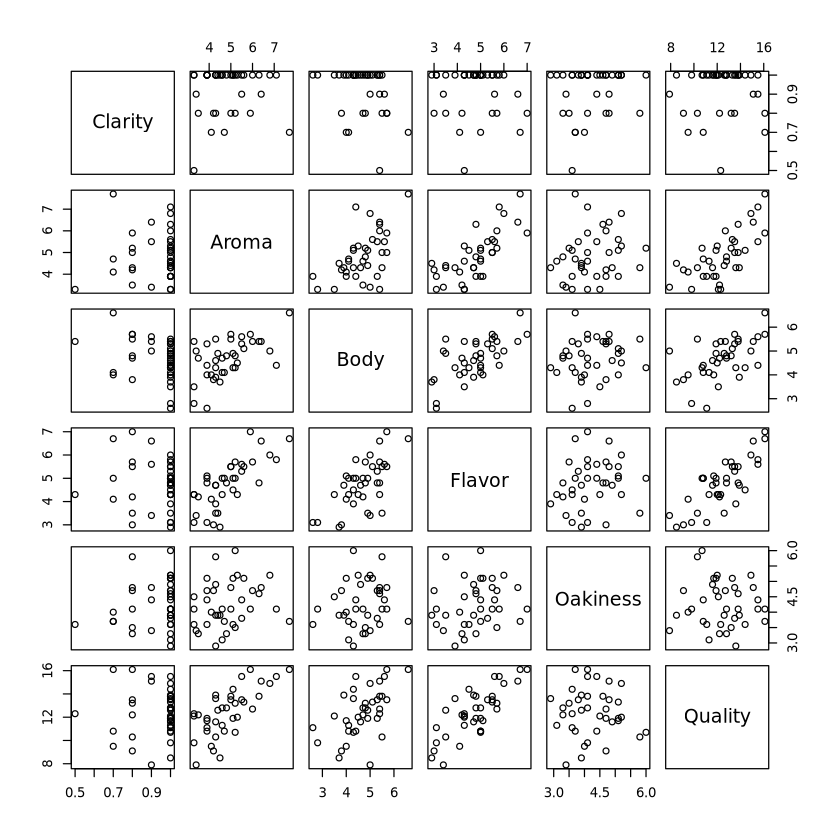

In [41]:
pairs(df)

In [42]:
cor(df)

,Clarity,Aroma,Body,Flavor,Oakiness,Quality
Clarity,1.00000000,0.0619021,-0.3083783,-0.08515993,0.18321471,0.02844131
Aroma,0.06190210,1.0000000,0.5489102,0.73656121,0.20164445,0.70732432
Body,-0.30837826,0.5489102,1.0000000,0.64665917,0.15210591,0.54870219
Flavor,-0.08515993,0.7365612,0.6466592,1.00000000,0.17976051,0.79004713
Oakiness,0.18321471,0.2016444,0.1521059,0.17976051,1.00000000,-0.04704047
Quality,0.02844131,0.7073243,0.5487022,0.79004713,-0.04704047,1.00000000


> Oakiness와 Quality간의 산점도는 별다른 관계가 없는 것처럼 보이는데다, Aroma와 Body는 일부 우상향하는 관계가 보임에도 불구하고 이례적인 결과가 나왔다.
>
> Aroma와 Body, Quality간 상관관계가 높기 때문에 발생하는 문제인 것으로 추정된다.

**(4) 이 모델에 대해 $R^2$와 수정된 $R^2$를 계산하여라. 이 값들을 향(Aroma)과 맛(Flavor)에 대한 선형 회귀 모델의 $R^2$와 수정된 $R^2$ 값과 비교하여라. 이 결과에 대해 논의하여라.**

In [43]:
print(paste("R squared : ", summary(predictr)$r.squared, ", adjustied R squared : ", summary(predictr)$adj.r.squared, sep = ""))

[1] "R squared : 0.720599218128954, adjustied R squared : 0.676942845961603"


In [44]:
rm_predictr <- lm(Quality~Aroma+Flavor, df)
print(paste("R squared : ", summary(rm_predictr)$r.squared, ", adjustied R squared : ", summary(rm_predictr)$adj.r.squared, sep = ""))

[1] "R squared : 0.658551520887921, adjustied R squared : 0.639040179224374"


> 설명변수 세개를 제외한 회귀모형을 적합했을 때, $R^2$와 $R^2_{adj}$의 값은 크게 줄어들지 않았다. 이는 $SSR_RM$과 $SSR_FM$의 값이 크게 차이가 나지 않는다는 것으로, 축소모형으로도 회귀모형을 설명하는 데에 충분할 수 있다는 가능성을 시사한다. 즉, 나머지 변수의 중요성이 그다지 크지 않을 수 있다. 이를 검정해보면 아래와 같다.

In [45]:
anova(rm_predictr, predictr)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,35,52.85227,NA,NA,NA,NA
2,32,43.24801,3,9.604265,2.368791,0.08907669


> $H_0 : \beta_1 = \beta_3 = \beta_5 = 0 ~ vs. ~ H_1 : ￢~H_0~;~\beta_1 : Clarity,~\beta_3 : Body,~\beta_5 : Oakiness$
>
> 유의수준 $\alpha = 0.05$일 때, p-value가 유의수준보다 크기 때문에 귀무가설을 기각할 수 없다. 즉, 세 회귀계수는 통계적으로 유의하지 않다. 따라서 축소모형을 사용하는 것이 더 적합하다.

**(5) (4)의 두 모델에 대해 맛(Flavor)의 회귀계수에 대한 $95\%$ 신뢰 구간을 구하여라. 차이점에 대해 예측의 정확도의 관점에서 논의하여라.**

In [46]:
confint(rm_predictr)

,2.5 %,97.5 %
(Intercept),2.29756233,6.394896
Aroma,-0.04219724,1.078127
Flavor,0.58032952,1.760003


In [47]:
lwb <- confint(predictr, level = 0.95)[5,1]
upb <- confint(predictr, level = 0.95)[5,2]
lwb_rm <- confint(rm_predictr, level = 0.95)[3,1]
upb_rm <- confint(rm_predictr, level = 0.95)[3,2]

print(paste("FM에서 맛의 회귀계수에 대한 95% CI : (", lwb, ", ", upb, ")", sep=""))
print(paste("RM에서 맛의 회귀계수에 대한 95% CI : (", lwb_rm, ", ", upb_rm, ")", sep=""))

[1] "FM에서 맛의 회귀계수에 대한 95% CI : (0.548116814222366, 1.78853071807131)"
[1] "RM에서 맛의 회귀계수에 대한 95% CI : (0.58032951679562, 1.7600033503455)"


> 모형을 축소시켰을 때의 신뢰구간이 더 줄어들었음을 알 수 있다. 이는 분산이 줄어들었다는 것에서 기인하여 회귀계수가 더 정확히 예측될 수 있도록 한다.

### 3. 'NFL14.csv'는 1976년 National Football League 1976에서 각 팀의 실적을 기록한 데이터이다. 다음 물음에 답하여라.

**(1) $y$(the number of games won)에 대하여 $x_2$(the team's passing yardage), $x_7$(the percentage of rushing plays)과 $x_8$(the opponent's yards rushing)의 세 변수를 사용하여 회귀모형을 적합하여라.**

In [52]:
NFL <- read.csv("NFL14.csv", header = TRUE)
head(NFL)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
1,10,2113,1985,38.9,64.7,4,868,59.7,2205,1917
2,11,2003,2855,38.8,61.3,3,615,55.0,2096,1575
3,11,2957,1737,40.1,60.0,14,914,65.6,1847,2175
4,13,2285,2905,41.6,45.3,-4,957,61.4,1903,2476
5,10,2971,1666,39.2,53.8,15,836,66.1,1457,1866
6,11,2309,2927,39.7,74.1,8,786,61.0,1848,2339


In [54]:
NFL_model <- lm(y~x2+x7+x8, NFL)
summary(NFL_model)


Call:
lm(formula = y ~ x2 + x7 + x8, data = NFL)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0370 -0.7129 -0.2043  1.1101  3.7049 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.808372   7.900859  -0.229 0.820899    
x2           0.003598   0.000695   5.177 2.66e-05 ***
x7           0.193960   0.088233   2.198 0.037815 *  
x8          -0.004816   0.001277  -3.771 0.000938 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.706 on 24 degrees of freedom
Multiple R-squared:  0.7863,	Adjusted R-squared:  0.7596 
F-statistic: 29.44 on 3 and 24 DF,  p-value: 3.273e-08


**(2) 분산분석표를 작성하고, 회귀직선에 대한 유의성 검정을 수행하여라.**

In [61]:
null_NFL <- lm(y~1, NFL)

anova(null_NFL, NFL_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27,326.9643,NA,NA,NA,NA
2,24,69.8700,3,257.0943,29.43687,3.273458e-08


ⅰ) $H_0 : \beta_0 = \beta_2 = \beta_7 = \beta_8 = 0 ~ vs. ~ H_1 : ￢~H_0$

ⅱ) $F = \frac{MSR}{MSE} \sim_{H_0} F(3, 24)$

ⅲ) $P(X ≥ f) = p-value ≤ \alpha = 0.05$이므로, 귀무가설을 기각하고 대립가설을 수용한다. 즉, 적합된 회귀직선은 유의하다.

**(3) 개별 회귀계수에 대한 유의성 검정을 수행하여라. $$H_0 : \beta_i = 0,~i=2,7,8$$ 그리고 각 변수의 역할에 대해 설명하여라.**

In [65]:
summary(NFL_model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.808372059,7.9008594002,-0.228883,8.208990e-01
x2,0.003598070,0.0006949986,5.177090,2.655723e-05
x7,0.193960210,0.0882334488,2.198262,3.781516e-02
x8,-0.004815494,0.0012769683,-3.771036,9.377699e-04


a)

가설 설정 $H_0 : \beta_2 = 0~vs.~\beta_2 \neq 0$

검정통계량 $T = \frac{\hat{\beta_2}-0}{\sigma_{\hat{\beta_2}}} \sim_{H_0} t(24)$

$P(X ≥ t) = 0.000027 ≤ \alpha = 0.05$ 이므로, 귀무가설을 기각하고 대립가설을 수용한다. 즉, 회귀계수는 유의하다.

> 경기의 플레이 중 러시를 행한 비율($x_7$)과 적이 러시해온 거리($x_8$)가 일정할 때, 아군이 패스를 통해 전진한 야드거리($x_2$)가 1 늘어나면 승리한 게임 수가 0.0036 정도 늘어난다고 예측할 수 있다.

b)

가설 설정 $H_0 : \beta_7 = 0~vs.~\beta_7 \neq 0$

검정통계량 $T = \frac{\hat{\beta_7}-0}{\sigma_{\hat{\beta_7}}} \sim_{H_0} t(24)$

$P(X ≥ t) = 0.0378 ≤ \alpha = 0.05$ 이므로, 귀무가설을 기각하고 대립가설을 수용한다. 즉, 회귀계수는 유의하다.

> 다른 설명변수의 값이 일정할 때, 경기 플레이 중 러시를 행한 비율이 1 증가하면 승리한 게임 수는 0.194정도 늘어난다.

c)

가설 설정 $H_0 : \beta_9 = 0~vs.~\beta_9 \neq 0$

검정통계량 $T = \frac{\hat{\beta_9}-0}{\sigma_{\hat{\beta_9}}} \sim_{H_0} t(24)$

$P(X ≥ t) = 0.0009378 ≤ \alpha = 0.05$ 이므로, 귀무가설을 기각하고 대립가설을 수용한다. 즉, 회귀계수는 유의하다.

> 다른 설명변수의 값이 일정할 때, 상대 팀이 러시를 해온 야드거리가 1 늘어나면, 승리한 게임 수가 -0.0048정도 감소한다고 예측할 수 있다.

**(4) $R^2$와 수정된 $R^2$를 구하여라.**

In [70]:
print(paste("R squared : ", summary(NFL_model)$r.squared, ", ", "Adjusted R squared : ", summary(NFL_model)$adj.r.squared, sep = ""))

[1] "R squared : 0.786306923310954, Adjusted R squared : 0.759595288724823"


**(5) 부분 F검정을 이용하여 $\beta_7$의 유의성에 대해 판단하여라. 부분 F검정 통계량과 (3)번에서의 t검정 통계량 사이에는 어떤 관계가 있는가?**

$H_0 : \beta_7 = 0 ~ vs. ~ H_1 : \beta_7 \neq 0$

In [71]:
NFL_rm <- lm(y~x2+x8, NFL)

anova(NFL_rm, NFL_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,25,83.9382,NA,NA,NA,NA
2,24,69.8700,1,14.06819,4.832354,0.03781516


$P(X ≥ f) = 0.0378 ≤ \alpha = 0.05$ 이므로, 귀무가설을 기각하고 대립가설을 수용한다. 즉, 회귀계수는 유의하다.

In [76]:
summary(NFL_model)$coef[3,3]^2
anova(NFL_rm, NFL_model)[2,5]

[1] 4.832354

[1] 4.832354

> $F(1, 24)$를 따르는 확률변수를 제곱근하면 $t(24)$를 따르게 되므로 부분 F검정 통계량은 (3)번에서의 t검정 통계량의 제곱이라는 관계가 있다.

**(6) $\beta_7$의 $95\%$ 신뢰구간을 구하여라.**

In [82]:
lwb <- confint(NFL_model)[3,1]
upb <- confint(NFL_model)[3,2]

print(paste("beta7의 95% CI : (", lwb, ", ", upb, ")", sep = ""))

[1] "beta7의 95% CI : (0.0118553215676868, 0.376065097598759)"


**(7) $x_2 = 2300, x_7 = 56, x_8 = 2100$일 때 평균반응에 대한 $95\%$ 신뢰구간을 구하여라.**

In [92]:
new_data <- data.frame(x2 = 2300, x7 = 56, x8 = 2100)
mean_rsp <- predict(NFL_model, new_data, interval = "confidence", level = 0.95)
lwb <- mean_rsp[1,2]
upb <- mean_rsp[1,3]

print(paste("평균반응에 대한 95% CI : (", lwb, ", ", upb, ")", sep = ""))

[1] "평균반응에 대한 95% CI : (6.43620277665723, 7.99664488933469)"


**(8) $x_7$과 $x_8$만을 이용한 회귀모형을 적합하고, 회귀모형의 유의성 검정을 수행하여라.**

In [85]:
NFL_rm2 <- lm(y~x7+x8, NFL)
summary(NFL_rm2)


Call:
lm(formula = y ~ x7 + x8, data = NFL)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7985 -1.5166 -0.5792  1.9927  4.5248 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 17.944319   9.862484   1.819  0.08084 . 
x7           0.048371   0.119219   0.406  0.68839   
x8          -0.006537   0.001758  -3.719  0.00102 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.432 on 25 degrees of freedom
Multiple R-squared:  0.5477,	Adjusted R-squared:  0.5115 
F-statistic: 15.13 on 2 and 25 DF,  p-value: 4.935e-05


가설 $H_0 : \beta_1 = \beta_7 = \beta_8 = 0 ~ vs. ~ H_1 : ￢~H_0$

In [87]:
anova(null_NFL, NFL_rm2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,27,326.9643,NA,NA,NA,NA
2,25,147.8981,2,179.0662,15.13425,4.9349e-05


$P(X ≥ f) = 0.000049 ≤ \alpha = 0.05$ 이므로, 귀무가설을 기각하고 대립가설을 수용한다. 즉, 적합된 회귀모형은 통계적으로 유의하다.

**(9) (8)의 모형에서 $R^2$와 수정된 $R^2$를 구하고, (4)의 결과와 비교하여 설명하여라.**

`-` (8) 모형에서의 결정계수

In [88]:
print(paste("R squared : ", summary(NFL_rm2)$r.squared, ", ", "Adjusted R squared : ", summary(NFL_rm2)$adj.r.squared, sep = ""))

[1] "R squared : 0.547662835055794, Adjusted R squared : 0.511475861860258"


In [89]:
print(paste("R squared : ", summary(NFL_model)$r.squared, ", ", "Adjusted R squared : ", summary(NFL_model)$adj.r.squared, sep = ""))

[1] "R squared : 0.786306923310954, Adjusted R squared : 0.759595288724823"


> 축소된 모형에서의 결정계수는 기존 모델에서의 결정계수보다 0.24가량 낮았으며, 수정된 결정계수 또한 비슷하게 낮았다. 즉, $x_2$라는 변수가 회귀모형에 기여하는 정도가 0.24인 것으로 해당 변수를 배제하고 회귀모형을 적합하기에는 부적절할 것으로 예상된다.

**(11) (8)의 모형에서 $x_7 = 56, x_8 = 2100$일 때 평균반응에 대한 $95\%$ 신뢰구간을 구하고, (7)의 결과와 비교하여 설명하여라.**

In [96]:
new_data_rm <- data.frame(x7 = 56, x8 = 2100)
predict(NFL_rm2, new_data_rm, interval = "confidence", level = 0.95) -> mean_rsp_rm
lwb_rm <- mean_rsp_rm[1,2]
upb_rm <- mean_rsp_rm[1,3]

print(paste("(축소 모형) 평균반응에 대한 95% CI : (", lwb_rm, ", ", upb_rm, ")", sep = ""))

[1] "(축소 모형) 평균반응에 대한 95% CI : (5.82864349972586, 8.02384163277886)"


In [98]:
print(paste("(전체 모형) 평균반응에 대한 95% CI : (", lwb, ", ", upb, ")", sep = ""))

[1] "(전체 모형) 평균반응에 대한 95% CI : (6.43620277665723, 7.99664488933469)"


> 설명변수를 하나 생략했을 때의 모형은 그렇지 않은 모형에 비해 신뢰구간이 넓었다.

**(12) 이 문제로부터 모델에서 중요한 예측변수를 생략했을 때의 결과에 대해 어떤 결론을 도출할 수 있는가?**

> 모델에서 중요한 예측변수를 생략할 경우 모형의 분산이 증가하고, 이에 따라 설명력이 감소하는 손실이 모형을 단순화함으로써 얻는 이득보다 심했다. 따라서 모형을 단순화할 때 예측변수의 중요도를 상관계수나 p-value로 먼저 파악하여 중요하지 않은 예측변수를 먼저 제거해야 한다.